# Seed Generation Demo

This notebook is a demonstration of how cingulate seed coordinates were determined for this project.

The method is from Margulies et al. 2009.
Seed coordinates were determined using three rules, listed here in order of precedence:

1. Seed coordinates are at least 10mm apart.
2. The lower seed coordinates are at least 5mm away from the corpus callosum
3. The upper seed coordinates are at least 10mm away from the lower seeds.

In [26]:
#Prep work
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nilearn
from nilearn.plotting import plot_connectome, plot_anat
from nilearn.masking import intersect_masks
nilearn.EXPAND_PATH_WILDCARDS = False

The first step is to model the curves of the corpus callosum. This was carried out using the MNI 152 brain, using the curvature of the corpus callosum at x=5.

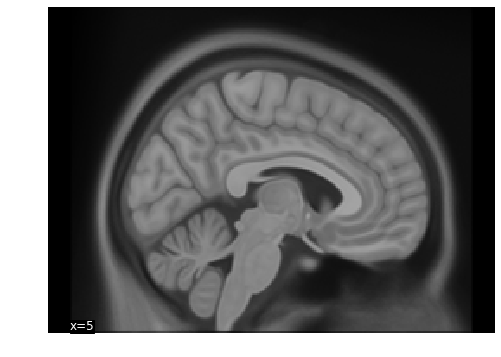

In [22]:
t1_file = r'./seed_generation_notebook_data/MNIBrain152/mni_icbm152_nlin_sym_09a_nifti/mni_icbm152_nlin_sym_09a/mni_icbm152_t1_tal_nlin_sym_09a.nii'
fig, ax = plt.subplots(figsize=(8, 6))
plot_anat(t1_file, display_mode='x', cut_coords=[5], draw_cross=False, axes=ax)

As the Margulies et al. 2009 method was only concerned with the anterior cingulate cortex, they only modeled the anterior part of the corpus callosum, using a single quadratic function. Using that function and the rules listed above, these are the seeds that they generated:

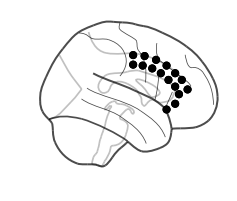

In [64]:
full_coords = pd.read_csv(r'seed_generation_notebook_data/seed_coordinates.csv', index_col=0)
acc_list = [i for i in full_coords.index if "ACC" in i]
acc_coords = full_coords.filter(acc_list, axis='index').values
n = len(acc_coords)

plot_connectome(np.zeros(shape=[n, n]), acc_coords, ['k']*n, display_mode='x')